In [1]:
library('dplyr')
library('rpart')
library('ggplot2')
library('fpc')



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
# file_path<-'~/Documents/Msc/Lessons 1st/Data Mining/Ergasia Filip/mf_lab/decathlon.csv'
file_path<-'./decathlon.csv'
decathlon<-read.csv(file_path, sep = ';')
head(decathlon)
# decathlon

,X,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.H,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
1,Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,OlympicG
2,Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,OlympicG
3,Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,OlympicG
4,Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,OlympicG
5,Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,OlympicG
6,Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.7,63.45,269.54,6,8287,OlympicG


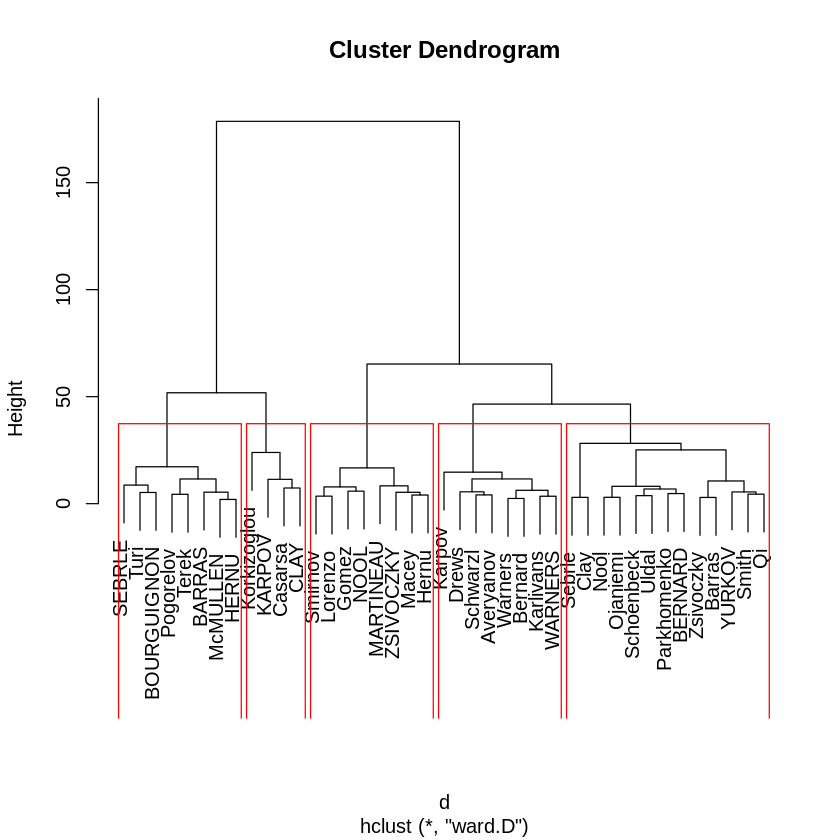

In [18]:
# Hierarchical clustering
pmatrix<-decathlon[,2:11]

d<-dist(pmatrix, method="euclidean") # distance matrix

pfit<-hclust(d, method="ward.D")
plot(pfit, labels=decathlon$X, cex= 1.0)

rect.hclust(pfit, k=5)


In [21]:
groups <- cutree(pfit, k=5)
# groups
# print_clusters <- function(labels, k) {
#     for(i in 1:k) {
#         print(paste("cluster", i))
#         print(decathlon[labels==i,c("X","X100m","Long.jump","Shot.put")])
#     }
# }
# print_clusters(groups, 5)
df<-mutate(decathlon, Cluster=groups)
df<-df[order(df$Cluster),]
df

,X,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.H,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition,Cluster
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
1,Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,1,8893,OlympicG,1
2,Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.90,69.71,282.00,2,8820,OlympicG,1
6,Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.70,63.45,269.54,6,8287,OlympicG,1
8,Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.40,61.33,276.33,8,8235,OlympicG,1
12,Schoenbeck,10.90,7.30,14.77,1.88,50.30,14.34,44.41,5.00,60.89,278.82,12,8077,OlympicG,1
13,Barras,11.14,6.99,14.91,1.94,49.41,14.37,44.83,4.60,64.55,267.09,13,8067,OlympicG,1
14,Smith,10.85,6.81,15.24,1.91,49.27,14.01,49.02,4.20,61.52,272.74,14,8023,OlympicG,1
16,Ojaniemi,10.68,7.50,14.97,1.94,49.12,15.01,40.35,4.60,59.26,275.71,16,8006,OlympicG,1
18,Qi,11.06,7.34,13.55,1.97,49.65,14.78,45.13,4.50,60.79,272.63,18,7934,OlympicG,1


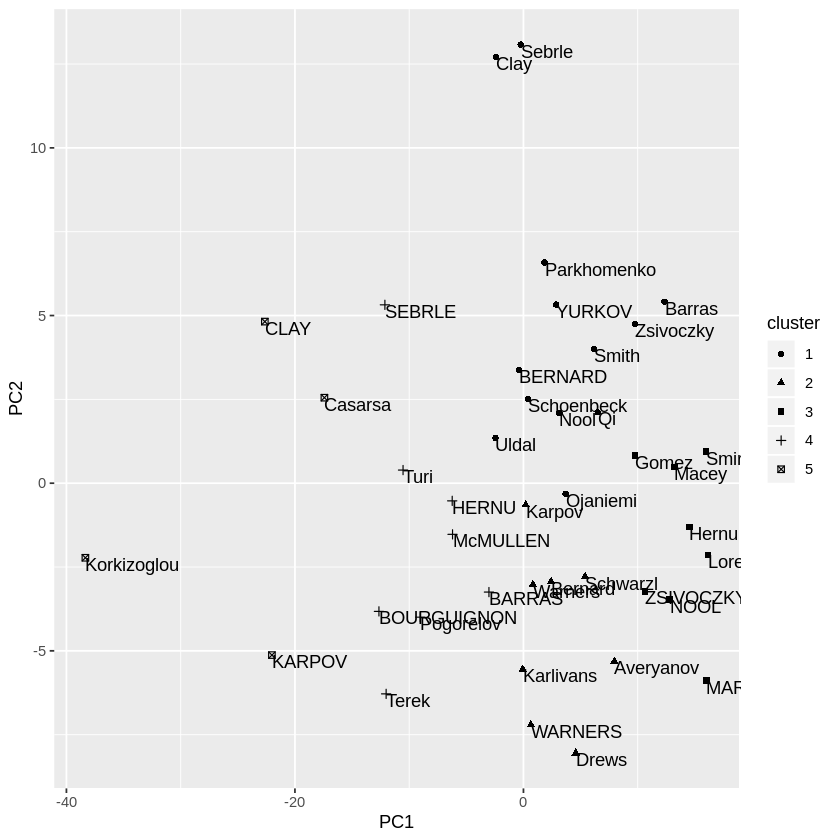

In [5]:
princ <- prcomp(pmatrix)
nComp <- 2
project <- predict(princ, newdata=pmatrix)[,1:nComp]
project.plus <- cbind(as.data.frame(project),
                    cluster=as.factor(groups),
                    X=decathlon$X)
ggplot(project.plus, aes(x=PC1, y=PC2)) + geom_point(aes(shape=cluster)) + geom_text(aes(label=X),hjust=0, vjust=1)

In [6]:
#K-Means

head(decathlon)

,X,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.H,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
1,Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,OlympicG
2,Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,OlympicG
3,Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,OlympicG
4,Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,OlympicG
5,Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,OlympicG
6,Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.7,63.45,269.54,6,8287,OlympicG


In [7]:
pclusters <- kmeans(decathlon[,2:11], 5, nstart=100, iter.max=100)
pclusters

K-means clustering with 5 clusters of sizes 10, 10, 10, 8, 3

Cluster means:
     X100m Long.jump Shot.put High.jump    X400m  X110m.H   Discus Pole.vault
1 10.86600  7.457000 14.34000  1.978000 48.97200 14.35000 42.94400   4.754000
2 11.10800  7.153000 14.30000  1.982000 49.15300 14.70800 43.83400   4.606000
3 10.96300  7.270000 14.80700  1.972000 49.69200 14.63800 45.14800   4.834000
4 11.11375  7.136250 14.40625  1.986250 50.90000 14.84750 44.04375   4.847500
5 10.88000  7.256667 14.61333  1.946667 49.63333 14.36667 48.58000   4.846667
  Javeline   X1500m
1 54.79100 276.5740
2 58.93100 265.9190
3 63.67900 277.8670
4 56.68250 289.7150
5 54.50333 306.2333

Clustering vector:
 [1] 3 3 1 2 1 2 2 3 1 1 4 3 2 3 1 1 2 3 1 3 4 2 4 2 1 5 3 4 4 5 5 3 3 1 2 4 2 4
[39] 1 2 4

Within cluster sum of squares by cluster:
[1] 261.7050 299.2088 347.0710 274.0792 242.1775
 (between_SS / total_SS =  79.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.wit

In [22]:
pclusters$centers
pclusters$cluster

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.H,Discus,Pole.vault,Javeline,X1500m
1,10.86600,7.457000,14.34000,1.978000,48.97200,14.35000,42.94400,4.754000,54.79100,276.5740
2,11.10800,7.153000,14.30000,1.982000,49.15300,14.70800,43.83400,4.606000,58.93100,265.9190
3,10.96300,7.270000,14.80700,1.972000,49.69200,14.63800,45.14800,4.834000,63.67900,277.8670
4,11.11375,7.136250,14.40625,1.986250,50.90000,14.84750,44.04375,4.847500,56.68250,289.7150
5,10.88000,7.256667,14.61333,1.946667,49.63333,14.36667,48.58000,4.846667,54.50333,306.2333


[1] 3 3 1 2 1 2 2 3 1 1 4 3 2 3 1 1 2 3 1 3 4 2 4 2 1 5 3 4 4 5 5 3 3 1 2 4 2 4
[39] 1 2 4

In [23]:
#  kmeansruns to pick the best k
clustering.ch <- kmeansruns(decathlon[,2:11], krange=1:10, criterion="ch") # Calinski-Harabasz Index 
clustering.ch

K-means clustering with 2 clusters of sizes 11, 30

Cluster means:
   X100m Long.jump Shot.put High.jump    X400m  X110m.H   Discus Pole.vault
1 11.050  7.169091 14.46273  1.975455 50.55455 14.71636 45.28091   4.847273
2 10.979  7.293333 14.48233  1.977333 49.27233 14.56533 43.97533   4.731333
  Javeline   X1500m
1 56.08818 294.2200
2 59.13367 273.4533

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 1 1 1 1 2 2 2 2 1 2 1
[39] 2 2 1

Within cluster sum of squares by cluster:
[1] 1171.088 2194.173
 (between_SS / total_SS =  51.5 %)

Available components:

 [1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
 [6] "betweenss"    "size"         "iter"         "ifault"       "crit"        
[11] "bestk"       

In [16]:
clustering.asw <- kmeansruns(decathlon[,2:11], krange=1:10, criterion="asw") # average silhouette width
clustering.asw

K-means clustering with 2 clusters of sizes 11, 30

Cluster means:
   X100m Long.jump Shot.put High.jump    X400m  X110m.H   Discus Pole.vault
1 11.050  7.169091 14.46273  1.975455 50.55455 14.71636 45.28091   4.847273
2 10.979  7.293333 14.48233  1.977333 49.27233 14.56533 43.97533   4.731333
  Javeline   X1500m
1 56.08818 294.2200
2 59.13367 273.4533

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 1 1 1 1 2 2 2 2 1 2 1
[39] 2 2 1

Within cluster sum of squares by cluster:
[1] 1171.088 2194.173
 (between_SS / total_SS =  51.5 %)

Available components:

 [1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
 [6] "betweenss"    "size"         "iter"         "ifault"       "crit"        
[11] "bestk"       